In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-treated-dataset/df_train.csv
/kaggle/input/house-price-prediction-treated-dataset/df_test.csv


# **Import**

In [149]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [150]:
df_train = pd.read_csv('/kaggle/input/house-price-prediction-treated-dataset/df_train.csv')
df_test = pd.read_csv('/kaggle/input/house-price-prediction-treated-dataset/df_test.csv')

**Data Description**
* date: Date of the home sale
* price: Price of each home sold
* bedrooms: Number of bedrooms
* bathrooms: Number of bathrooms
* living_in_m2: Square meters of the apartments interior living space
* nice_view: A flag that indicates the view's quality of a property
* perfect_condition: A flag that indicates the maximum index of the apartment condition
* grade: An index from 1 to 13, where 1 falls short of quality level and 13 have a high quality level of construction and design
* has_basement: A flag indicating whether or not a property has a basement
* renovated: A flag if the property was renovated
* has_lavatory: Check for the presence of these incomplete/secondary bathrooms (bathtub, sink, toilet)
* single_floor: A flag indicating whether the property had only one floor
* month: The month of the home sale
* quartile_zone: A quartile distribution index of the most expensive zip codes, where 1 means less expansive and 4 most expansive.

In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               14105 non-null  object 
 1   price              14105 non-null  float64
 2   bedrooms           14105 non-null  int64  
 3   grade              14105 non-null  int64  
 4   has_basement       14105 non-null  bool   
 5   living_in_m2       14105 non-null  float64
 6   renovated          14105 non-null  bool   
 7   nice_view          14105 non-null  bool   
 8   perfect_condition  14105 non-null  bool   
 9   real_bathrooms     14105 non-null  int64  
 10  has_lavatory       14105 non-null  bool   
 11  single_floor       14105 non-null  bool   
 12  month              14105 non-null  int64  
 13  quartile_zone      14105 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 964.3+ KB


In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6948 non-null   object 
 1   price              6948 non-null   float64
 2   bedrooms           6948 non-null   int64  
 3   grade              6948 non-null   int64  
 4   has_basement       6948 non-null   bool   
 5   living_in_m2       6948 non-null   float64
 6   renovated          6948 non-null   bool   
 7   nice_view          6948 non-null   bool   
 8   perfect_condition  6948 non-null   bool   
 9   real_bathrooms     6948 non-null   int64  
 10  has_lavatory       6948 non-null   bool   
 11  single_floor       6948 non-null   bool   
 12  month              6948 non-null   int64  
 13  quartile_zone      6948 non-null   int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 475.1+ KB


In [153]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14105.0,499821.940730,245712.681606,78000.00000,319000.00000,443500.00000,625000.00000,1.485000e+06
bedrooms,14105.0,3.339171,0.880132,0.00000,3.00000,3.00000,4.00000,7.000000e+00
grade,14105.0,7.593407,1.092411,1.00000,7.00000,7.00000,8.00000,1.200000e+01
living_in_m2,14105.0,187.540971,76.273966,26.94187,130.99323,174.65764,231.32847,6.949144e+02
real_bathrooms,14105.0,1.707409,0.685596,0.00000,1.00000,2.00000,2.00000,6.000000e+00
month,14105.0,6.603828,3.116637,1.00000,4.00000,6.00000,9.00000,1.200000e+01
quartile_zone,14105.0,2.467990,1.087813,1.00000,2.00000,2.00000,3.00000,4.000000e+00


In [154]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6948.0,500180.455527,246466.205134,75000.00000,320000.000000,447000.000000,620000.00000,1.485000e+06
bedrooms,6948.0,3.350461,0.886833,0.00000,3.000000,3.000000,4.00000,7.000000e+00
grade,6948.0,7.580455,1.098832,3.00000,7.000000,7.000000,8.00000,1.200000e+01
living_in_m2,6948.0,187.564084,76.220497,34.37411,131.341616,176.469248,231.32847,6.614694e+02
real_bathrooms,6948.0,1.723805,0.697007,0.00000,1.000000,2.000000,2.00000,6.000000e+00
month,6948.0,6.527778,3.106609,1.00000,4.000000,6.000000,9.00000,1.200000e+01
quartile_zone,6948.0,2.467473,1.087747,1.00000,2.000000,2.000000,3.00000,4.000000e+00


**Missing Value Check**

In [155]:
df_train.isnull().sum()

date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

In [156]:
df_test.isnull().sum()

date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

**Duplicated value check**

In [157]:
df_train.duplicated().sum()

2

In [158]:
df_test.duplicated().sum()

0

In [159]:
df_train.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-06-20,237000.0,3,7,False,120.77390,False,False,False,1,False,True,6,2
1,2015-04-20,1328000.0,5,9,True,310.29602,True,True,False,3,False,True,4,4
2,2014-08-13,790500.0,4,9,False,311.22505,False,False,False,2,True,False,8,4
3,2015-04-08,431000.0,4,9,False,282.42512,False,False,False,2,True,False,4,2
4,2015-02-11,199000.0,3,7,True,162.58025,False,False,False,2,True,True,2,2


In [160]:
df_test.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2015-03-19,235000.0,3,7,False,121.70293,False,False,False,1,False,True,3,1
1,2014-09-05,998000.0,4,10,False,350.24431,False,False,False,3,True,False,9,1
2,2014-12-19,430000.0,1,7,False,58.52889,False,False,False,1,False,True,12,4
3,2014-05-14,300000.0,3,6,False,117.05778,False,False,False,1,False,True,5,3
4,2014-08-14,243500.0,3,6,False,196.02533,False,False,False,3,False,True,8,1


# **2. Data Transform & Visualization**

In [161]:
#Data consolidation

df = pd.concat([df_train,df_test])

In [162]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).drop(columns=['date']).columns

## **Histogram**

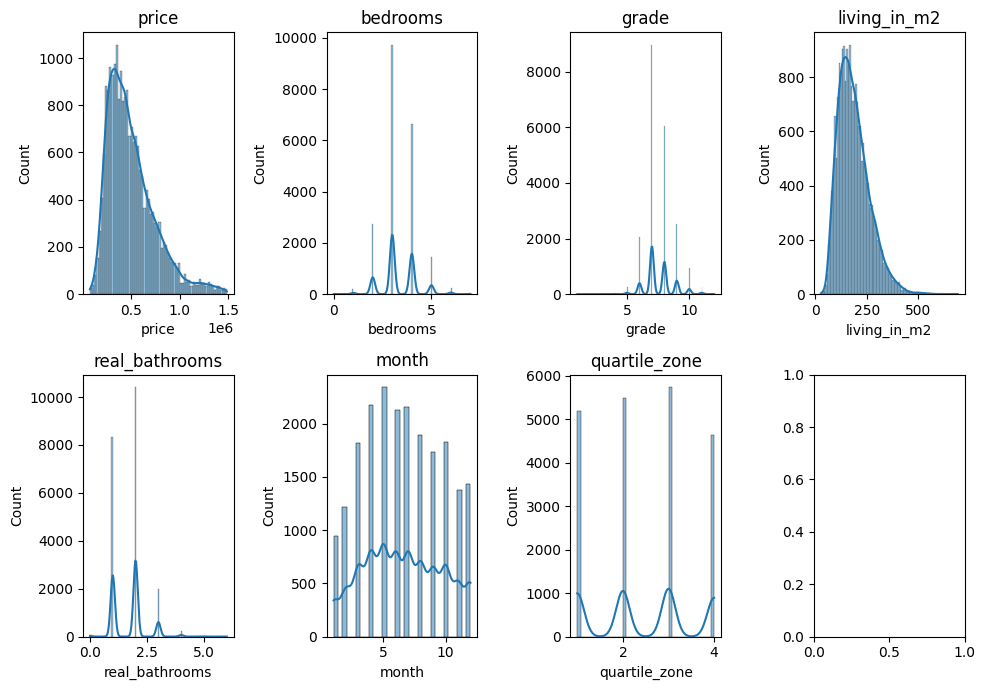

In [163]:
f, ax = plt.subplots(2,4,figsize = (10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df , x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Boxplot**

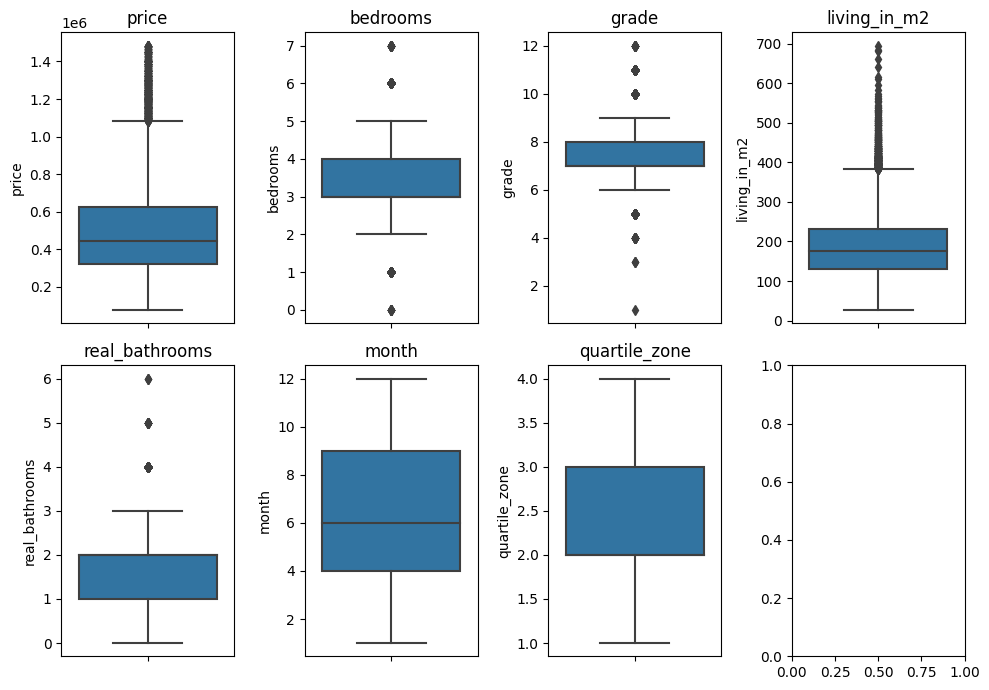

In [164]:
f, ax = plt.subplots(2,4 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **CountPlot**

In [165]:
cat_cols

Index(['has_basement', 'renovated', 'nice_view', 'perfect_condition',
       'has_lavatory', 'single_floor'],
      dtype='object')

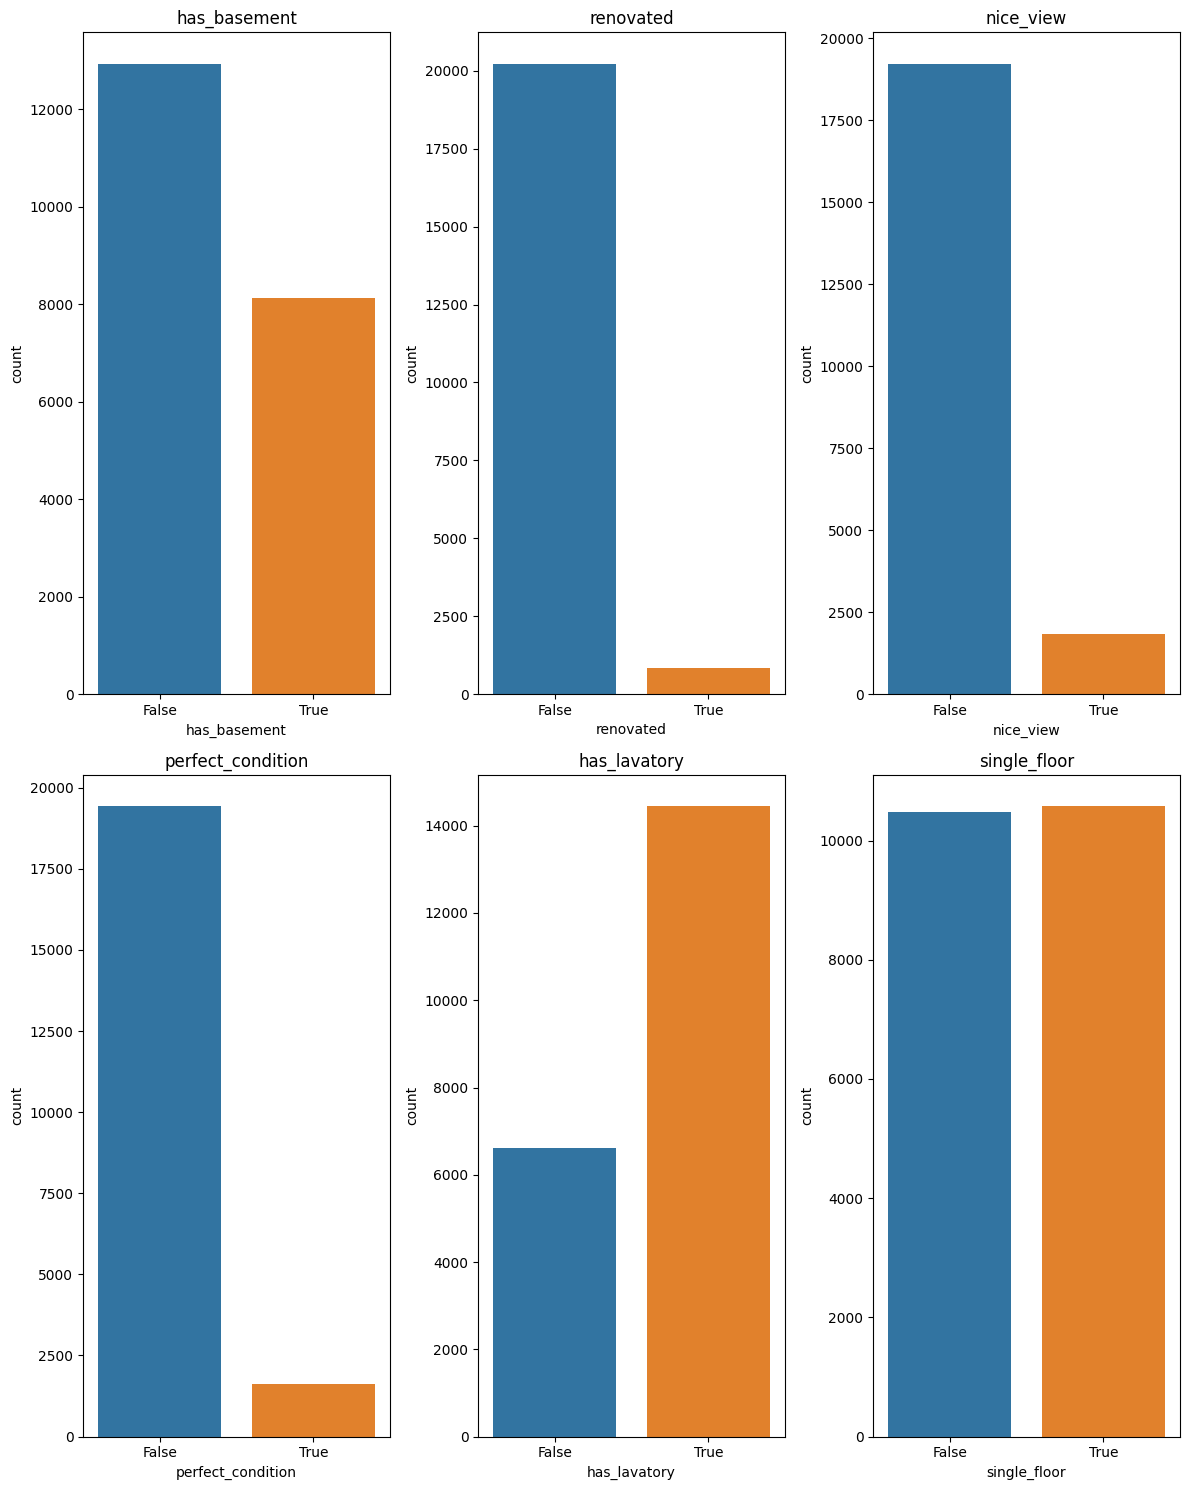

In [166]:
f, ax = plt.subplots(2,3 , figsize=(12, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Average price by number of bedrooms**

In [167]:
bedrooms = df.groupby(['bedrooms'])['price'].mean().reset_index()

In [168]:
bedrooms

,bedrooms,price
0,0,409503.846154
1,1,317642.884422
2,2,397917.066812
3,3,451210.505706
4,4,581489.182724
5,5,644429.085048
6,6,647744.407258
7,7,658750.531250


In [169]:
px.bar(bedrooms, x= 'bedrooms' , y = 'price', text_auto = True, title = 'Average price by number of bedrooms', template='plotly')

## **Average price by number of grade**

In [170]:
grade = df.groupby(['grade'])['price'].mean().reset_index()

In [171]:
grade

,grade,price
0,1,1.420000e+05
1,3,2.056667e+05
2,4,2.143810e+05
3,5,2.485240e+05
4,6,3.019196e+05
5,7,4.016761e+05
6,8,5.368583e+05
7,9,7.328438e+05
8,10,9.028993e+05
9,11,1.085750e+06


In [172]:
px.bar(grade, x= 'grade' , y = 'price', text_auto = True, title = 'Average price by number of grade', template='plotly')

## **Average Price by View Assessment**

In [173]:
view = df.groupby(['nice_view'])['price'].mean().reset_index()

In [174]:
view

,nice_view,price
0,False,477566.971909
1,True,734957.583607


In [175]:
px.bar(view, x= 'nice_view' , y = 'price', text_auto = True, title = 'Average Price by View Assessment', template='plotly')

## **Correlation**

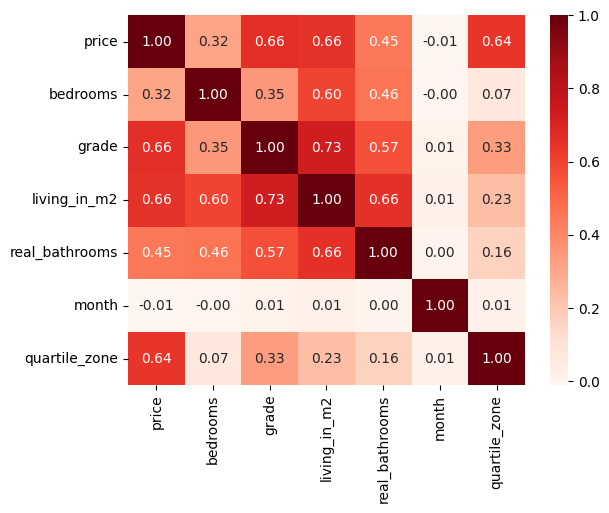

In [176]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import sklearn
sklearn.metrics.SCORERS.keys()
from sklearn.model_selection import GridSearchCV

## **Data Preprocessing**

In [178]:
df = df.drop(columns={'date'}, axis=1)

In [179]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

## **Train Test Split**

In [180]:
x = df.drop('price', axis=1)
y = df['price']

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Modeling**

In [182]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
lnr = LinearRegression()
xgb = XGBRegressor()

models = [rfc, gbc, lnr, xgb]

names = ["Random Forest", "Gradient Boosting", 
         "Linear Regression", "XGBoost"]

In [183]:
index = 0
mse_ = []
r2_ = []
mae_ = []
rmse_ = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f'{names[index]}')
    
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    
    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    
    index += 1

Random Forest
MSE:  15015727704.691149
RMSE:  122538.67840274412
MAE:  85395.04040675027
r2:  0.7085197379362351
--------------------------------------------------
Gradient Boosting
MSE:  13511695568.350441
RMSE:  116239.81920301856
MAE:  81740.20844422471
r2:  0.7133574262811884
--------------------------------------------------
Linear Regression
MSE:  15297536268.824886
RMSE:  123683.20932456793
MAE:  88554.41941134303
r2:  0.6713118111107095
--------------------------------------------------
XGBoost
MSE:  14083485660.786823
RMSE:  118673.86258476136
MAE:  82082.4441937782
r2:  0.7210291277856071
--------------------------------------------------


## **Evaluation**

In [184]:
reg_df = pd.DataFrame({'Model': names, 'MSE': mse_, 'RMSE':rmse_ ,'MAE': mae_ ,'R2 Score': r2_})
reg_df['MSE'] = round(reg_df['MSE'],4)
reg_df['RMSE'] = round(reg_df['RMSE'],4)
reg_df['MAE'] = round(reg_df['MAE'],4)
reg_df['R2 Score'] = round(reg_df['R2 Score'],4)

In [185]:
reg_df

,Model,MSE,RMSE,MAE,R2 Score
0,Random Forest,1.501573e+10,122538.6784,85395.0404,0.7085
1,Gradient Boosting,1.351170e+10,116239.8192,81740.2084,0.7134
2,Linear Regression,1.529754e+10,123683.2093,88554.4194,0.6713
3,XGBoost,1.408349e+10,118673.8626,82082.4442,0.7210


In [186]:
md_cols = ['MSE','RMSE','MAE','R2 Score']

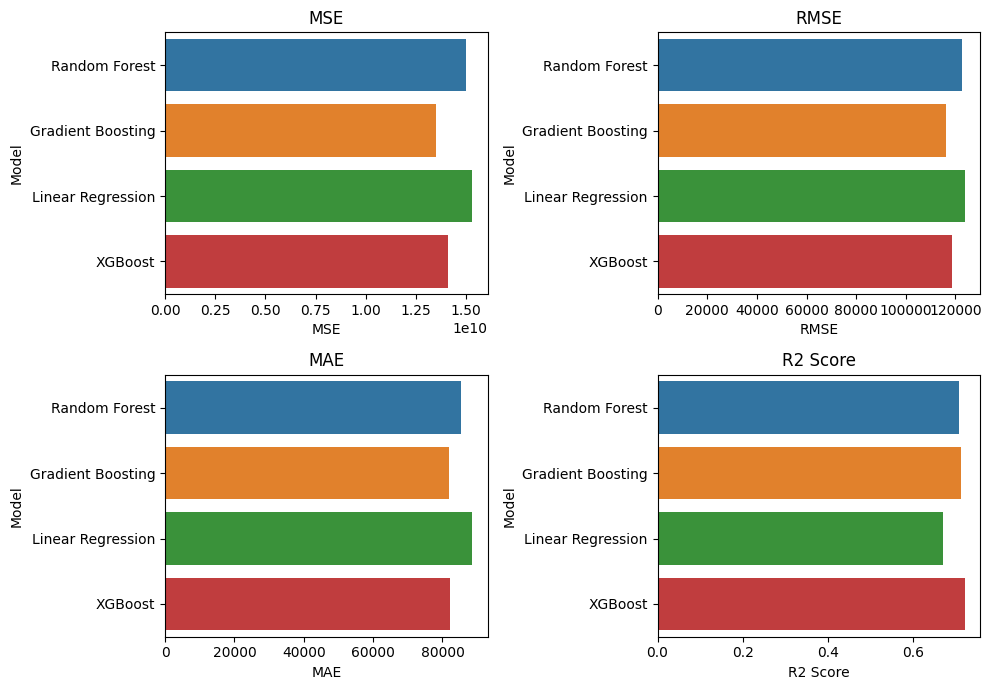

In [187]:
f, ax = plt.subplots(2,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(md_cols):
    sns.barplot(data = reg_df, x= cols, y = 'Model', ax = ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show() 

**The best model is gradient boosting. Because MSE, RMSE, and MAE are the lowest**

## **Tune**

In [188]:
n_estimators = [100, 200, 300]
learning_rate = [0.05, 0.1, 0.2]

In [189]:
parameters = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate
}

In [190]:
reg = GridSearchCV(gbc, parameters, cv = 3, verbose=2,
                   scoring="neg_root_mean_squared_error")

In [191]:
reg

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [192]:
reg.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.8s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.8s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.8s
[CV] END ...............learning_rate=0.05, n_estimators=200; total time=   1.5s
[CV] END ...............learning_rate=0.05, n_estimators=200; total time=   1.5s
[CV] END ...............learning_rate=0.05, n_estimators=200; total time=   1.5s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   2.3s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   2.3s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   2.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.8s
[CV] END ................learning_rate=0.1, n_est

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [193]:
best_params = reg.best_params_
best_score = reg.best_score_

In [194]:
print(f'Best parameters: {best_params}')
print(f'Best score: {abs(best_score)}')

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best score: 117185.94674844363


In [195]:
pd.DataFrame(reg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,1.493544,0.015058,0.020637,0.001432,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",-117290.811721,-118064.762130,-116202.266394,-117185.946748,763.967752,1
2,2.237499,0.024749,0.028973,0.000723,0.05,300,"{'learning_rate': 0.05, 'n_estimators': 300}",-117447.928936,-118051.117809,-116422.503689,-117307.183478,672.286125,2
5,2.253450,0.038662,0.025608,0.001556,0.1,300,"{'learning_rate': 0.1, 'n_estimators': 300}",-117472.291321,-117985.432609,-116584.535420,-117347.419783,578.689847,3
3,0.757033,0.008220,0.012320,0.000264,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",-117637.711603,-118653.918620,-116707.780949,-117666.470391,794.767580,4
1,1.495195,0.025595,0.021542,0.000257,0.05,200,"{'learning_rate': 0.05, 'n_estimators': 200}",-117755.044428,-118538.604026,-116807.852479,-117700.500311,707.628210,5
6,0.760183,0.012384,0.011098,0.000242,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",-118011.063533,-118751.552370,-116810.888141,-117857.834681,799.647307,6
7,1.498756,0.016943,0.017913,0.000291,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",-118302.635818,-118469.782369,-117118.890947,-117963.769711,601.303909,7
8,2.226710,0.029162,0.024171,0.000369,0.2,300,"{'learning_rate': 0.2, 'n_estimators': 300}",-119199.814958,-119024.916471,-117793.047322,-118672.592917,626.017950,8
0,0.749684,0.007849,0.013166,0.000455,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",-119770.105115,-120242.478327,-118915.455629,-119642.679690,549.196528,9


In [199]:
best_model = reg.best_estimator_
pred_ = best_model.predict(x_test)

In [200]:
mse__ = mean_squared_error(pred_, y_test)
rmse__ = np.sqrt(mse)
mae__ = mean_absolute_error(pred_, y_test)
r2__ = r2_score(pred_, y_test)

## **Comparison**

In [201]:
# After tuning

print("MSE: ", mse__)
print("RMSE: ", rmse__)
print("MAE: ", mae__)
print("r2: ", r2__)

MSE:  13416820702.554335
RMSE:  118673.86258476136
MAE:  81196.75889194419
r2:  0.7217261620839441


In [209]:
# Before tuning

reg_df[reg_df['Model'] == 'Gradient Boosting']

,Model,MSE,RMSE,MAE,R2 Score
1,Gradient Boosting,1.351170e+10,116239.8192,81740.2084,0.7134


**Thankyou. Please leave your advice in the comments.**